In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Regresion Lineal - Matriz Inversa


$$Ax=b$$

$$A^TAx = A^Tb$$

$$x = (A^TA)^{-1}A^Tb$$

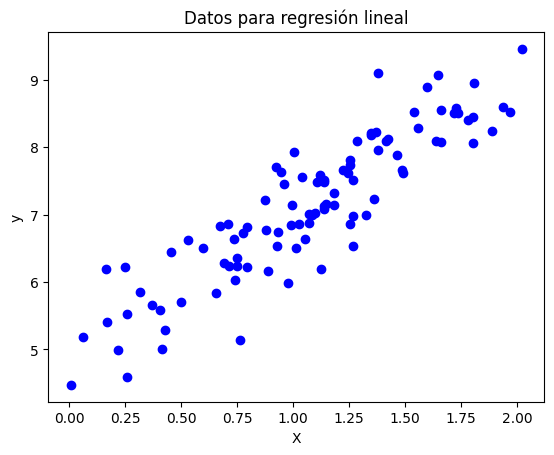

In [2]:
#Generacion de datos para la regresion lineal
# Parámetros para la recta
M = 2.0  # Pendiente
b = 5.0  # Intercepto

# Generar 200 valores para X con una distribución normal
x_vals = np.random.normal(1.0, 0.5, 100)

# Generar los valores de y utilizando la ecuación de la recta y = Ax + b y añadiendo algo de ruido
noise = np.random.normal(0.0, 0.5, 100)  # Ruido con dispersión
y_vals = M * x_vals + b + noise


# Visualización de los datos generados
plt.scatter(x_vals, y_vals, color='blue')
plt.title("Datos para regresión lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [3]:
#construccion de las matices y los tensores

#pasa x_vals a una matriz columna
x_vals_column = np.transpose(np.matrix(x_vals))
#crea una matriz de columnas rellena con el valor 1
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [4]:
#Calculos de mattrices en tensorflow
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.linalg.inv(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

#Resultado del calculo
print(f'M = {solution[0].numpy()[0]:.3f}, b = {solution[1].numpy()[0]:.3f} ')

M = 2.061, b = 4.922 


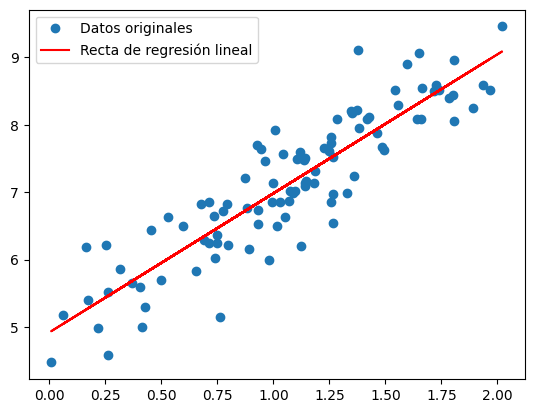

In [5]:
best_fit = []
for i in x_vals:
    best_fit.append(solution[0].numpy()[0]*i+solution[1].numpy()[0])

plt.plot(x_vals, y_vals, 'o', label = "Datos originales")
plt.plot(x_vals, best_fit, 'r-', label = "Recta de regresión lineal")
plt.legend(loc = "upper left")
plt.show()